In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as sn

1st order ODE

$\frac{dy}{dx} + y = x$,

y(0) = 1

Above has a closed-form solution:

$y = x - 1 + 2 e^{-x}$


1. Exact/Analytical solution
2. ODEINT (scipy.integrate)
3. RK Method

SHM: 
https://scicomp.stackexchange.com/questions/26877/using-rk2-method-to-solve-the-simple-harmonic-oscillator-of-a-horizontal-mass-on

In [ ]:
x0, y0 = 0.0, 1.0
x = np.linspace(0, 5, 100)

def exacty(x):
    return x - 1 + 2*np.exp(-x)

def flhs(y,x):
    return x-y

In [ ]:
odeys = sn.odeint(flhs, y0, x )

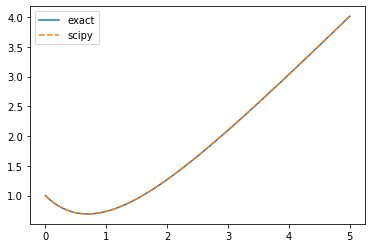

In [ ]:
plt.plot(x, exacty(x),label='exact')
plt.plot(x, odeys.squeeze(),'--', label='scipy')
plt.legend()

In [ ]:
# RK4

#stepsize


h = 0.1
k1 = flhs(y0, x0)
k2 = flhs(y0 + h*k1/2, x0 + h/2)
k3 = flhs(y0 + h*k2/2, x0 + h/2)
k4 = flhs(y0 + h*k3, x0 + h)

x1 = x0 + h
y1 = y0 + (h/6)*(k1 + 2*k2 + 2*k3 + k4)

print(x0, y0, k1, k2, k3, k4, x1, y1)



0.0 1.0 -1.0 -0.8999999999999999 -0.9049999999999999 -0.8095 0.1 0.909675


In [ ]:
def rk4(flhs, x0, y0, n=50, h=0.1):

    x = []
    y = []
    for i in range(n):
        k1 = flhs(y0, x0)
        k2 = flhs(y0 + h*k1/2, x0 + h/2)
        k3 = flhs(y0 + h*k2/2, x0 + h/2)
        k4 = flhs(y0 + h*k3, x0 + h)

        x1 = x0 + h
        y1 = y0 + (h/6)*(k1 + 2*k2 + 2*k3 + k4)

        #print(x0, y0, k1, k2, k3, k4, x1, y1)
        x.append(x0)
        y.append(y0)
        

        x0 = x1
        y0 = y1
    
    return x, y

In [ ]:
xrk4, yrk4 = rk4(flhs, x0, y0)

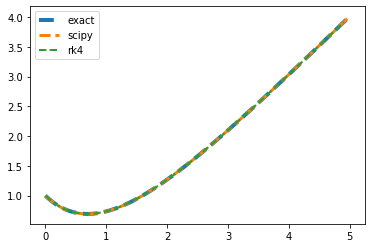

In [ ]:
plt.plot(x, exacty(x),'--', lw=4., label='exact')
plt.plot(x, odeys.squeeze(),'--',lw=3, label='scipy')
plt.plot(xrk4, yrk4,'--', lw=2, label='rk4')
plt.legend()

In [ ]:
# Classical mechanics (dynamical system)
# Kepler's motion, SHM
https://www.compadre.org/PICUP/resources/Numerical-Integration/

# Leapfrog/Velocity-verlet

ref: http://cvarin.github.io/CSci-Survival-Guide/leapfrog.html

(Leapfrog)
$\frac{d^2 x}{dt^2} = a(x)$

or  (RK4)

$\frac{dv}{dt} = a(x)$,
$\frac{dx}{dt} = v(x)$

or 

$d{\theta}/dt = \omega$,
$d{\omega}/dt = - k \theta$

$d{\omega}/dt = -k sin(theta) - \gamma \omega$


Population growth

N'(t) = rN(t)




In [ ]:
theta0 = np.radians(5)
omega0 = 0
g = 9.8
L = 1
k = g/L

dt = 0.01

In [ ]:
# Euler's method

omega1 = omega0 - k theta0 *dt
theta1 = theta0 + omega0*dt